## Práctica 1: Parte I
### Elizaveta Gilyarovskaya

In [20]:
from PIL import Image
import os
import PIL
import numpy as np

imagenes = [i for i in os.listdir() if i[-3::]== 'png']
face1 = Image.open(imagenes[1])
face2 = Image.open(imagenes[3])


# Comprobamos el número de canales y si es necesario convertimos a gris
if face1.mode != "L":
    face1 = face1.convert("L")

# Comprobamos el número de canales y si es necesario convertimos a gris
if face2.mode != "L":
    face2 = face2.convert("L")

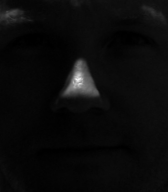

In [22]:
face1

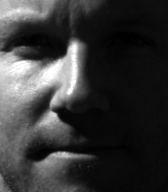

In [23]:
face2

Defino la siguiente función auxiliar para emplear el método clip cada vez que lo necesite y acortar el código de las funciones de ésta primera práctica.

In [10]:
def aux_clip(I:np.ndarray):
    I = np.clip(I, 0, 255)
    return np.uint8(I)

In [11]:
def BrilloContraste(im:PIL.PngImagePlugin.PngImageFile, alpha:float, beta:float): 
    # el input y el output de las funciones son fotos png
    I = np.array(im)
    I2 = (I*alpha) + beta
    I2 = aux_clip(I2)
    return Image.fromarray(I2)

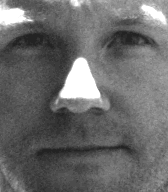

In [12]:
BrilloContraste(face1, 8.25, 35)

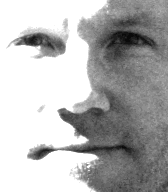

In [47]:
BrilloContraste(face2, 10.25, 10)

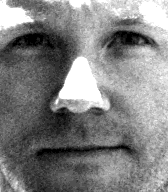

In [13]:
def Stretching(im:PIL.PngImagePlugin.PngImageFile, H: np.ndarray):
    def transform(I):
        return H[I] 
    I = np.array(im)
    I2 = np.vectorize(transform)(I)
    I2 = aux_clip(I2)

    return Image.fromarray(I2)

#looktable para convertir un nivel de gris a otro, 
# el primer tramo es exponencial 16..32.. y el segundo tramo es más aplanado
H = np.hstack((16*np.linspace(start=0, stop=128, num=128), 2*np.linspace(start=129,stop=256, num=128))) 

Stretching(face1, H)

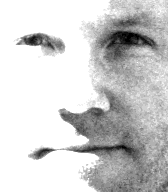

In [48]:
Stretching(face2, H)

In [14]:
def Ecualizado(im:PIL.PngImagePlugin.PngImageFile):
    # permite aprovechar al máximo el rango dinámico
    # se consigue un histograma plano
    # f es una función de densidad acumulada que cuenta cuántos píxeles de la imagen 
    # tienen un nivel igual o inferior a x
    f = [np.count_nonzero(np.array(im) <= i) for i in range(256)]
    H = [(255 / np.array(im).size) * f[g] for g in range(256)] #ahora la looktable esta optimizada para la imagen dada
    return Stretching(im, H)


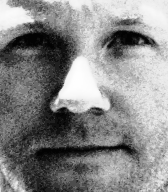

In [15]:
Ecualizado(face1)

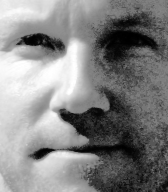

In [49]:
Ecualizado(face2)

In [16]:
from skimage import exposure

def EcualizadoLocal(im:PIL.PngImagePlugin.PngImageFile, window:float):
    I = np.array(im)
    I2 = exposure.equalize_adapthist(I/255, kernel_size= window)
    I2 = aux_clip(I2*255)
    return Image.fromarray(I2)

im = np.array(face1)
window = im.shape[0] / 25 # sacamos una ventana, una terceava parte de la imagen


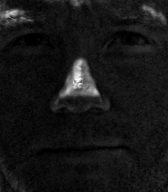

In [17]:
EcualizadoLocal(face1, window)

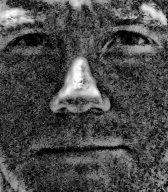

In [18]:
ad = EcualizadoLocal(face1, window)
ad = EcualizadoLocal(ad, window*2)
ad = EcualizadoLocal(ad, window*8)
ad